In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
ls

drive/  sample_data/


In [0]:
cd drive/My\ Drive

/content/drive/My Drive


In [0]:
ls

'Business Model Canvas.gdoc'  'Leftovers .gdoc'
 CITREP_Data+Code/            'Oral Presentation.gdoc'
 Classroom/                   'Quality Control.gdoc'
'Colab Notebooks'/            'Quality Control Slides.gslides'
'Getting started.pdf'


In [0]:
cd CITREP_Data+Code/

/content/drive/My Drive/CITREP_Data+Code


In [0]:
ls

 2a-TensorFlow-Data-Loading.ipynb
 2b-TensorFlow-ML.ipynb
 3a-TF-FcNN-MNIST.ipynb
 3b-TF-FcNN-MNIST-Exercise.ipynb
 3c-FcNN-CIFAR10.ipynb
 3d-FcNN-CIFAR10-Exercise.ipynb
 3-diabetic-NeuralNet-Exercise-TF.ipynb
 3e-keras-FCNN-MNIST.ipynb
 3f-keras-FcNN-dogscats.ipynb
 3g-keras-FcNN-bloodcell-Exercise.ipynb
 3h-keras-FC-AutoEncoder.ipynb
 4a-MNIST-CNN-TF.ipynb
 4b-CIFAR10-CNN-TF-Exercise.ipynb
 5a-keras-CNN-dogscats.ipynb
 5b-keras-CNN-Bloodcell.ipynb
 5c-keras-Con-AutoEncoder.ipynb
 5d-keras-Vgg16-dogscats.ipynb
 5e-Resnet50-keras-dogscats-Exercise.ipynb
 6-Semeion-Classification-SimpleCNN-Exercise.ipynb
 7-RNN-IMDB.ipynb
'CITREP+ - Clarence & Dr Sudipta - Deep Learning with Tensorflow and Python - v2.pdf'
 Data/
 mnist/
 models/
 tensorboard.ipynb


In [0]:
# Loading MNIST Data; only images no labels
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train_fcnn = np.reshape(x_train, (len(x_train), 28*28))
x_test_fcnn = np.reshape(x_test, (len(x_test), 28*28))

print(x_train.shape)
print(x_train_fcnn.shape)

(60000, 28, 28)
(60000, 784)


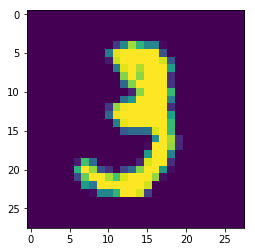

In [0]:
plt.imshow(x_train_fcnn[10].reshape(28, 28))

### Adding Noise to the Data

In [0]:
#adding noise factor intentionlly
#pick random pixels from the image and add them randomly 

noise_factor = 0.5
x_train_fcnn_noise = x_train_fcnn + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size=x_train_fcnn.shape)
x_test_fcnn_noise = x_test_fcnn + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size=x_test_fcnn.shape)

print(x_train_fcnn_noise.min())
print(x_train_fcnn_noise.max())

x_train_fcnn_noise = np.clip(x_train_fcnn_noise, 0., 1.)
x_test_fcnn_noise = np.clip(x_test_fcnn_noise, 0., 1.)

print(x_train_fcnn_noise.min())
print(x_train_fcnn_noise.max())

-2.611887537467347
3.4792991305787586
0.0
1.0


### Display Noise Data

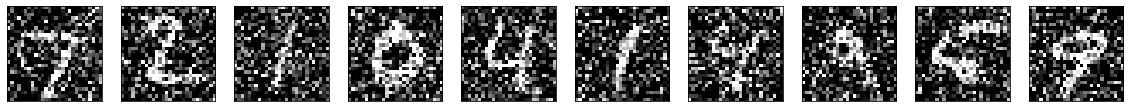

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_fcnn_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

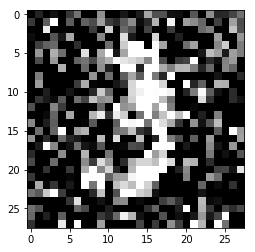

In [0]:
plt.imshow(x_train_fcnn_noise[10].reshape(28, 28))

### Build Fc-AutoEncoder Model

In [0]:
#the auto-encoder that we want to build so that we can get back our input

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)

#we use sigmoid because the outputs returned are in between 0 to 1
decoded = Dense(784, activation='sigmoid')(decoded)

### Train the Auto-Encoder

In [0]:
#training portion

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_fcnn_noise, x_train_fcnn, #pixel to pixel comparison (we are not using y-train this time)
                epochs=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_fcnn_noise, x_test_fcnn))

#the more times we run this code here, the clearer the image output

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 46us/step - loss: 0.2001 - val_loss: 0.1958
Epoch 2/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.1922 - val_loss: 0.1879


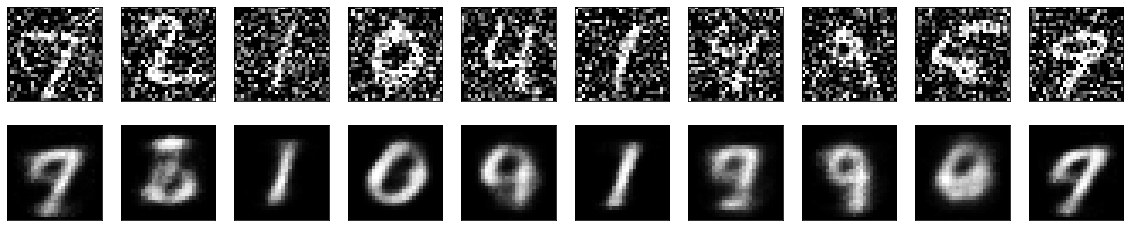

In [0]:
decoded_imgs = autoencoder.predict(x_test_fcnn_noise)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_fcnn_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()